### 전이학습: TF-Hub 이용
* tf-hub에서 모델을 다운받아 이미지 분류에 활용

In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/Othercomputers/내\ 노트북_before/Devpy/14.딥러닝

Mounted at /content/drive
/content/drive/Othercomputers/내 노트북_before/Devpy/14.딥러닝


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image

In [ ]:
%pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_hub as hub

In [ ]:
trained_mobilenet_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

In [ ]:
mbnet_model = Sequential(
    hub.KerasLayer(trained_mobilenet_url,input_shape=(224,224,3))
)

In [ ]:
type(mbnet_model)

keras.engine.sequential.Sequential

In [ ]:
mbnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


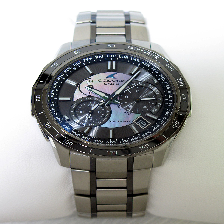

In [ ]:
Image_watch = image.load_img('./data/watch.jpg',target_size=(224,224))
Image_watch

In [ ]:
type(Image_watch)

PIL.Image.Image

In [ ]:
#이미지를 array로 변환
Image_watch = image.img_to_array(Image_watch)
#이미지 4D텐서로 변환
Image_watch = np.expand_dims(Image_watch,axis=0)

In [ ]:
Image_watch.min(),Image_watch.max()

(0.0, 255.0)

In [ ]:
#Normalization
Image_watch = Image_watch/255.0

In [ ]:
Image_watch.min(),Image_watch.max()

(0.0, 1.0)

In [ ]:
#이미지 분류
predict = mbnet_model.predict(Image_watch)
np.argmax(predict)

827

In [ ]:
predict.shape

(1, 1001)

>* ImageNet의 클래스 종류

https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

In [ ]:
s_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')


# C:\Users\user\.keras\datasets 아래에 다운받아져 있음

24576/10484 [======================================================================] - 0s 0us/step


In [ ]:
s_path

'/root/.keras/datasets/ImageNetLabels.txt'

In [ ]:
imagenet_labels = open(s_path).read().splitlines()
imagenet_labels = np.array(imagenet_labels)

In [ ]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [ ]:
imagenet_labels[827]

'stopwatch'

In [ ]:
imagenet_labels[np.argmax(predict)]

'stopwatch'

---

## 라이온 분류 연습

---

# flower 분류

In [ ]:
Image_Sample = image.load_img('./data/sunflower.jpg',target_size=(224,224))
#이미지를 array로 변환
Image_Sample = image.img_to_array(Image_Sample)
#이미지 4D텐서로 변환
Image_Sample = np.expand_dims(Image_Sample,axis=0)
#Normalization
Image_Sample = Image_Sample/255.0
#이미지 분류
predict = mbnet_model.predict(Image_Sample)

#이미지 라벨 디코딩
imagenet_labels[np.argmax(predict)]

'daisy'

>* 해바라기를 데이지로 인식하네....
>* 꽃 데이터를 학습시켜서 꽃 종류 5개를 분류할 수 있는 모델로 만들어야 겠다. 
>* 처음부터 모델을 개발하려면, 대량의 데이터와 양질의 데이터를 모으는데도 시간이 많이 든다. 
>* 전이학습 기술을 사용하여, 이미 이미지 학습 모델을 바탕으로 나만의 꽃 분류 모델을 만들겠다.

## tensorflow 리소스 활용

https://www.tensorflow.org/datasets/catalog/tf_flowers

In [ ]:
flower_data_url = tf.keras.utils.get_file('flower_photos',
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
untar=True)



228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
flower_data_url

'/root/.keras/datasets/flower_photos'

In [ ]:
image_generator = image.ImageDataGenerator(rescale=1/255)


In [ ]:
flowers_data = image_generator.flow_from_directory(flower_data_url,target_size=(224,224),shuffle=True)

Found 3670 images belonging to 5 classes.


In [ ]:
flowers_data.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
for flowers_data_batch, flower_data_label_batch in flowers_data:
    print("Image batch size: ", flowers_data_batch.shape)
    print("Label batch size: ", flower_data_label_batch.shape)
    break

Image batch size:  (32, 224, 224, 3)
Label batch size:  (32, 5)


In [ ]:
flowers_data = image_generator.flow_from_directory(flower_data_url,target_size=(224,224),batch_size=64,shuffle=True)

Found 3670 images belonging to 5 classes.


In [ ]:
for flowers_data_batch, flower_data_label_batch in flowers_data:
    print("Image batch size: ", flowers_data_batch.shape)
    print("Label batch size: ", flower_data_label_batch.shape)
    break

Image batch size:  (64, 224, 224, 3)
Label batch size:  (64, 5)


> * 한번에 64장 이미지를 가져와서 학습

In [ ]:
predict_batch = mbnet_model.predict(flowers_data_batch)
predict_batch.shape

(64, 1001)

In [ ]:
np.argmax(predict_batch,axis=-1)

array([717, 310, 986, 948, 329, 981, 310, 986,  95, 717, 986, 986, 986,
       986, 999, 990, 986,  74, 986, 986, 986, 986, 581, 329, 985, 951,
       310, 986, 986, 600, 739, 986, 988, 326, 717, 986, 739, 476, 986,
       329, 739, 750, 739, 986, 310, 302, 986, 986, 644, 986, 986,  85,
       311, 320, 717, 986, 986, 986, 750, 986, 113, 717, 990, 992])

In [ ]:
predict_class = imagenet_labels[np.argmax(predict_batch,axis=-1)]

In [ ]:
predict_class

array(['picket fence', 'bee', 'daisy', 'mushroom', 'sea urchin',
       'volcano', 'bee', 'daisy', 'hummingbird', 'picket fence', 'daisy',
       'daisy', 'daisy', 'daisy', 'ear', 'hip', 'daisy', 'barn spider',
       'daisy', 'daisy', 'daisy', 'daisy', 'greenhouse', 'sea urchin',
       'rapeseed', 'orange', 'bee', 'daisy', 'daisy', 'honeycomb', 'pot',
       'daisy', 'corn', 'sulphur butterfly', 'picket fence', 'daisy',
       'pot', 'car mirror', 'daisy', 'sea urchin', 'pot', 'quill', 'pot',
       'daisy', 'bee', 'ladybug', 'daisy', 'daisy', 'mask', 'daisy',
       'daisy', 'peacock', 'ant', 'dragonfly', 'picket fence', 'daisy',
       'daisy', 'daisy', 'quill', 'daisy', 'conch', 'picket fence', 'hip',
       'coral fungus'], dtype='<U30')

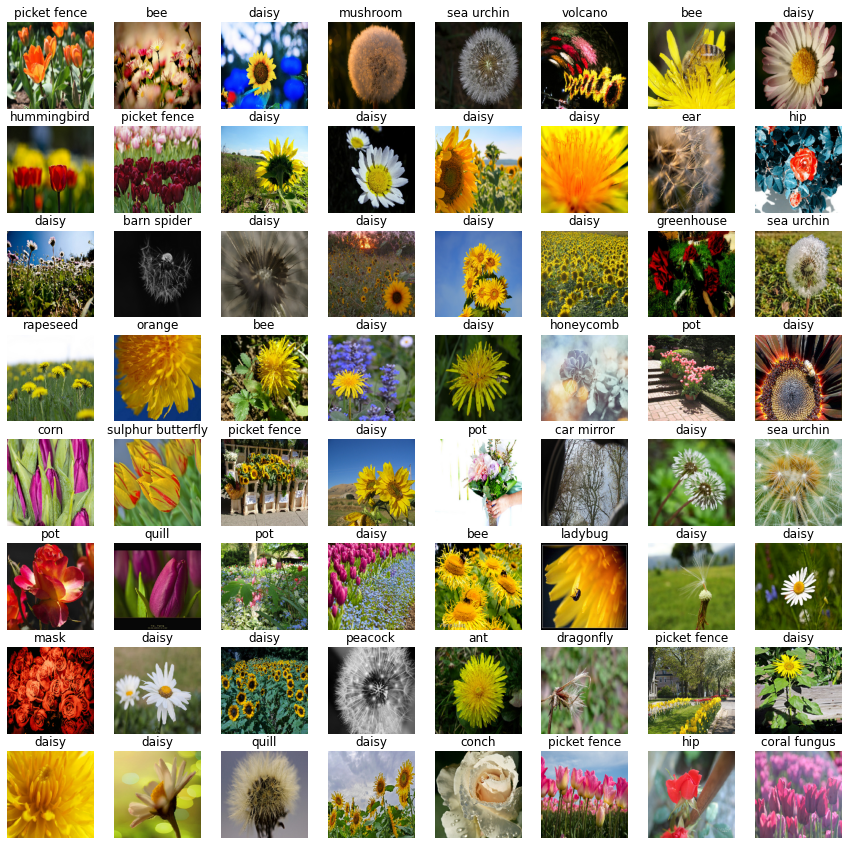

In [ ]:
plt.figure(figsize=(15,15))
for n in range(64):
    plt.subplot(8,8,n+1)
    plt.imshow(flowers_data_batch[n])
    plt.title(predict_class[n])
    plt.axis('off')

>* 하나도 맞는게 없다.

----

## Feature Extractor

* TF-Hub 활용

In [ ]:
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url, input_shape=(224,224,3))

In [ ]:
feature_batch = MobileNet_feature_extractor_layer(flowers_data_batch) #64장의 이미지 삽입

In [ ]:
feature_batch.shape #64장 이미지에 대한 특징 1280개 추출

TensorShape([64, 1280])

In [ ]:
MobileNet_feature_extractor_layer.trainable

False

In [ ]:
MobileNet_feature_extractor_layer.trainable=False #훈련 동결

In [ ]:
flowers_data.num_classes

5

* 전이학습을 할 모델 디자인
1. MobileNet Feature Extractor (base model)
2. Dese Network(flowers.data 5개 클래스를 처리하는 단계)

In [ ]:
model = Sequential()
model.add(MobileNet_feature_extractor_layer)
model.add(Dense(units=5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(flowers_data,epochs=5)

Epoch 1/5
58/58 [==============================] - 105s 2s/step - loss: 0.7780 - accuracy: 0.7185
Epoch 2/5
58/58 [==============================] - 102s 2s/step - loss: 0.3800 - accuracy: 0.8752
Epoch 3/5
58/58 [==============================] - 106s 2s/step - loss: 0.3045 - accuracy: 0.9025
Epoch 4/5
58/58 [==============================] - 100s 2s/step - loss: 0.2594 - accuracy: 0.9158
Epoch 5/5
58/58 [==============================] - 98s 2s/step - loss: 0.2302 - accuracy: 0.9264


In [ ]:
flowers_data.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
class_name =[key for key in flowers_data.class_indices]

In [ ]:
class_name

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
class_name[0]

'daisy'

In [ ]:
class_name[[0,1,0]]

TypeError: ignored

In [ ]:
class_name = np.array(class_name)

In [ ]:
class_name[[0,1,0]]

array(['daisy', 'dandelion', 'daisy'], dtype='<U10')

In [ ]:
class_name

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [ ]:
predict_batch = model.predict(flowers_data_batch)

In [ ]:
predict_id = np.argmax(predict_batch,axis=-1)

In [ ]:
predict_id

array([4, 4, 3, 1, 1, 3, 1, 0, 4, 4, 3, 0, 3, 1, 1, 2, 0, 1, 1, 3, 3, 3,
       2, 1, 1, 1, 1, 1, 1, 2, 4, 3, 4, 4, 3, 3, 2, 1, 1, 1, 4, 4, 4, 4,
       1, 1, 1, 0, 2, 0, 3, 1, 1, 1, 4, 3, 1, 0, 1, 3, 2, 4, 4, 4])

In [ ]:
predicted_label_batch = class_name[predict_id]
predicted_label_batch

array(['tulips', 'tulips', 'sunflowers', 'dandelion', 'dandelion',
       'sunflowers', 'dandelion', 'daisy', 'tulips', 'tulips',
       'sunflowers', 'daisy', 'sunflowers', 'dandelion', 'dandelion',
       'roses', 'daisy', 'dandelion', 'dandelion', 'sunflowers',
       'sunflowers', 'sunflowers', 'roses', 'dandelion', 'dandelion',
       'dandelion', 'dandelion', 'dandelion', 'dandelion', 'roses',
       'tulips', 'sunflowers', 'tulips', 'tulips', 'sunflowers',
       'sunflowers', 'roses', 'dandelion', 'dandelion', 'dandelion',
       'tulips', 'tulips', 'tulips', 'tulips', 'dandelion', 'dandelion',
       'dandelion', 'daisy', 'roses', 'daisy', 'sunflowers', 'dandelion',
       'dandelion', 'dandelion', 'tulips', 'sunflowers', 'dandelion',
       'daisy', 'dandelion', 'sunflowers', 'roses', 'tulips', 'tulips',
       'tulips'], dtype='<U10')

In [ ]:
label_id = np.argmax(flower_data_label_batch,axis=-1)
true_label = class_name[label_id]
true_label

array(['tulips', 'daisy', 'sunflowers', 'dandelion', 'dandelion',
       'sunflowers', 'dandelion', 'daisy', 'tulips', 'tulips',
       'sunflowers', 'daisy', 'sunflowers', 'dandelion', 'dandelion',
       'roses', 'daisy', 'dandelion', 'dandelion', 'sunflowers',
       'sunflowers', 'sunflowers', 'roses', 'dandelion', 'dandelion',
       'dandelion', 'dandelion', 'dandelion', 'dandelion', 'roses',
       'tulips', 'sunflowers', 'tulips', 'tulips', 'sunflowers',
       'sunflowers', 'roses', 'tulips', 'dandelion', 'dandelion', 'roses',
       'tulips', 'tulips', 'tulips', 'sunflowers', 'dandelion',
       'dandelion', 'daisy', 'roses', 'daisy', 'sunflowers', 'dandelion',
       'dandelion', 'dandelion', 'tulips', 'sunflowers', 'dandelion',
       'daisy', 'dandelion', 'sunflowers', 'roses', 'tulips', 'roses',
       'tulips'], dtype='<U10')

In [ ]:
print("Pre:{}\nTrue:{}".format(predicted_label_batch[0],true_label[0]))


Pre:tulips
True:tulips


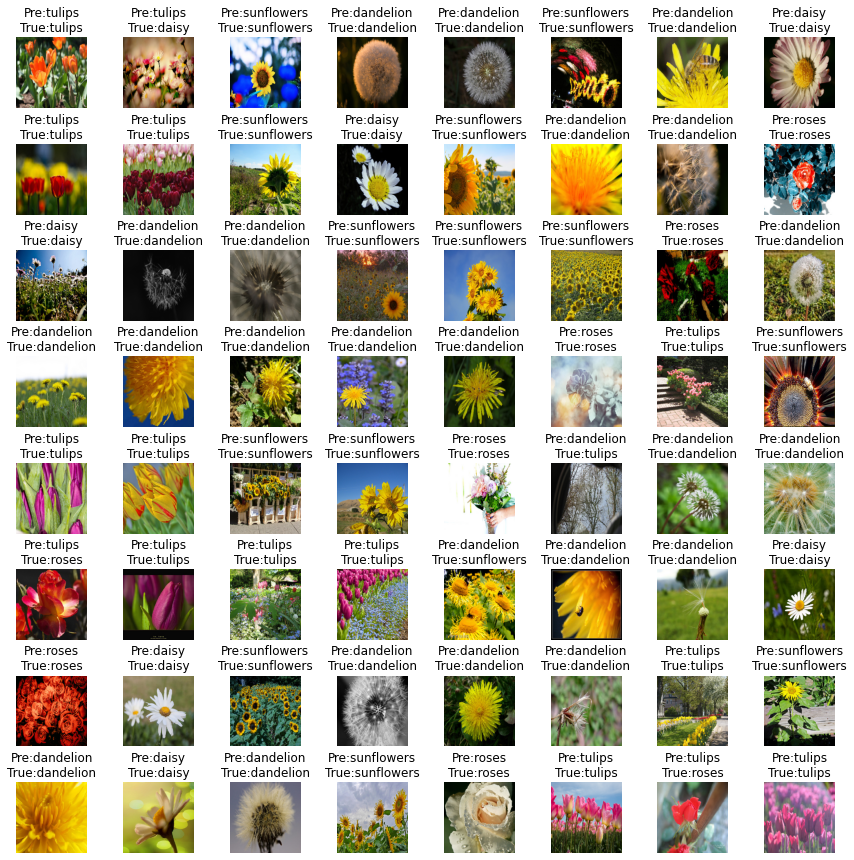

In [ ]:
plt.figure(figsize=(15,15))
for n in range(64):
    plt.subplot(8,8,n+1)
    plt.imshow(flowers_data_batch[n])
    plt.title("Pre:{}\nTrue:{}".format(predicted_label_batch[n],true_label[n]))
    plt.axis('off')

plt.subplots_adjust(hspace=0.5)


In [ ]:
model.evaluate(flowers_data_batch,flower_data_label_batch)

2/2 [==============================] - 1s 244ms/step - loss: 0.1479 - accuracy: 0.9688


[0.1478545367717743, 0.96875]